## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
Trial_Count = len(combined_data["Mouse ID"].unique())
print(f"There are {Trial_Count} experiments")

There are 249 experiments


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= combined_data[combined_data["Mouse ID"].isin(duplicate_mouse) == False]


In [5]:
# Checking the number of mice in the clean DataFrame.
Mouse_Count = len(clean_df["Mouse ID"].unique())

print(f"There are {Mouse_Count} mice in this study")

There are 248 mice in this study


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mr_df = clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean = mr_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = mr_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = mr_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd = mr_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = mr_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analysis_df = pd.DataFrame({"mean tv":mean,"median tv":median,"variance":variance, "SD": sd, "SEM": sem})
analysis_df

,mean tv,median tv,variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

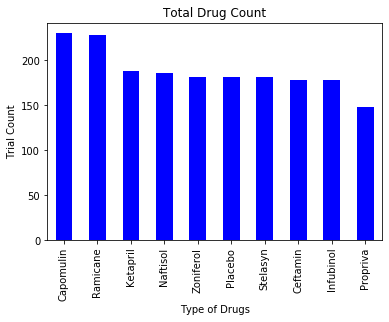

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drug_counts = clean_df["Drug Regimen"].value_counts()
y_axis = drug_counts.values
x_axis = drug_counts.index

drug_counts.plot(kind = "bar", facecolor = 'blue',)

# Formatting
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation = 90)
plt.show()

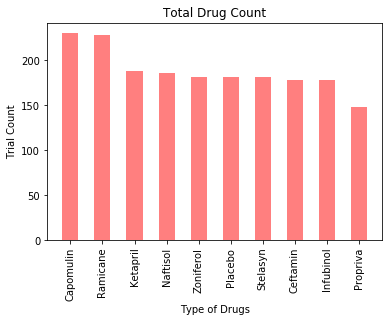

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_counts = clean_df["Drug Regimen"].value_counts()

# Axis Variables
y_axis = drug_counts.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs = drug_counts.index
                 
# Matplotlib
plt.bar(x_drugs, y_axis, color = 'r', alpha = 0.5, align =  "center", width =  .5)

# Formatting
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation = 90)

plt.show()

## Pie Plots

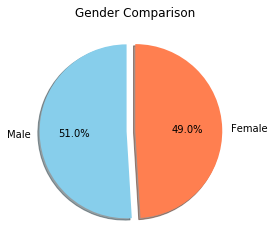

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count = clean_df["Sex"].value_counts()

# Labels
labels = mf_count.index

# Values
sizes = mf_count.values

# Colors

colors = ["skyblue", "coral"]

# Explode Male Column

explode = [0.1,0]

# Print with Pandas

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)

# Formatting
plt.title("Gender Comparison")
plt.show()

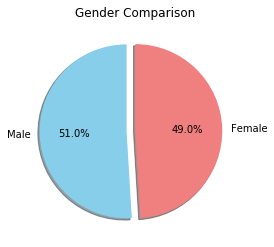

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count=clean_df["Sex"].value_counts()

# Labels
labels = mf_count.values

# Values
sizes = mf_count.values

# Colors

colors = ["skyblue", "lightcoral"]

# Explode Male Column

explode = [0.1,0]

# Create Pie Chart

mf_count.plot(kind = "pie", explode = explode, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)

# Formatting
plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_tumor = clean_df.groupby("Mouse ID").max().reset_index()

merge_data = max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on = ["Mouse ID","Timepoint"], how = 'left')

merge_data.round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [12]:
capomulin = merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Capomulin quartiles
quartile_cap = capomulin.quantile([.25,.5,.75])
lower_cap = quartile_cap[.25]
upper_cap = quartile_cap[.75]
iqr = upper_cap-lower_cap
# Capomulin Outliers
lower_ocap = lower_cap - (1.5*iqr)
upper_ocap = upper_cap + (1.5*iqr)

In [13]:
# Ramicane quartiles
quartile_ram = ramicane.quantile([.25,.5,.75])
lower_ram = quartile_ram[.25]
upper_ram = quartile_ram[.75]
iqr = upper_ram-lower_ram
# Ramicane Outliers
lower_oram = lower_ram-(1.5*iqr)
upper_oram = upper_ram+(1.5*iqr)

In [14]:
# Infubinol quartiles
quartile_in = infubinol.quantile([.25,.5,.75])
lower_in = quartile_in[.25]
upper_in = quartile_in[.75]
iqr = upper_in-lower_in
# Infubionol Outliers
lower_oin = lower_in-(1.5*iqr)
upper_oin = upper_in+(1.5*iqr)

In [15]:
# Ceftamin quartiles
quartile_ce = ceftamin.quantile([.25,.5,.75])
lower_ce = quartile_ce[.25]
upper_ce = quartile_ce[.75]
iqr= upper_ce-lower_ce
# Ceftmain Outliers
lower_oce = lower_ce-(1.5*iqr)
upper_oce = upper_ce+(1.5*iqr)


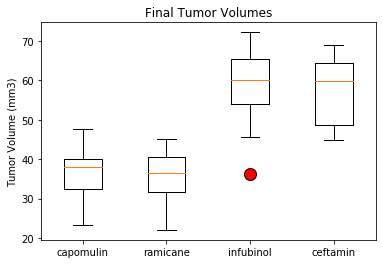

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor = 'red',markersize = 12)

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels = ["capomulin","ramicane","infubinol","ceftamin"], flierprops = orange_out)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

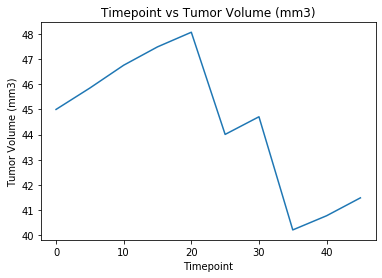

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse = clean_df.loc[clean_df['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

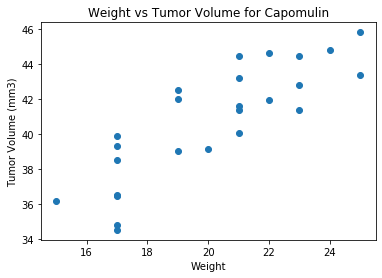

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg = capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

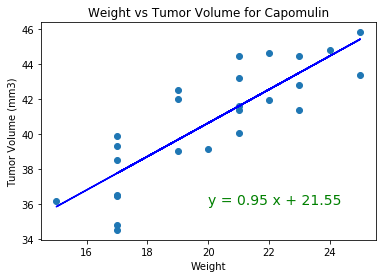

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr) = linregress(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
regress_values = cap_avg["Weight (g)"]* slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color = 'blue')
plt.annotate(line_eq,(20,36), color = 'green', fontsize = 14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

In [20]:
print(f"Correlation between these two variables is {round(rvalue,2)}")

Correlation between these two variables is 0.84
